# Visualisations des KPIs

## Objectif
Créer des visualisations pertinentes et dynamiques pour les KPIs identifiés, afin de permettre leur intégration dans un tableau de bord interactif.

---


## Import des dataFrames

In [6]:
import pandas as pd

df_kpi_final = pd.read_csv('../donnees/nettoyees/df_kpi_final.csv')

In [3]:
df_kpi_final.head()

,Genre,Age,Ville,Niveau étude,Pression Académique,CGPA,Satisfaction Académique,Temps de sommeil,Habitudes Alimentaires,Pensées Suicidaires,Temps études/jour(heures),Stress Financier,Antécédents familiaux mentaux,Dépression,Etat,Population,Latitude,Longitude
0,Homme,33,Visakhapatnam,Bachelor,5,8.97,2,5-6 heures,Saines,True,3,1,False,1,Andhra Pradesh,969608,17.7000,83.2500
1,Femme,24,Bangalore,Bachelor,2,5.90,5,5-6 heures,Modérées,False,3,2,True,0,Karnataka,15386000,12.9789,77.5917
2,Homme,31,Srinagar,Bachelor,3,7.03,5,Moins de 5 heures,Saines,False,9,1,True,0,Jammu & Kashmir,1180570,34.0800,74.8000
3,Femme,28,Varanasi,Bachelor,3,5.59,2,7-8 heures,Modérées,True,4,5,True,1,Uttar Pradesh,1198491,25.3200,82.9900
4,Femme,25,Jaipur,Master,4,8.13,3,5-6 heures,Modérées,True,1,1,False,0,Rajasthan,3073350,26.9200,75.7800


## **KPI 1** - Proportion d'étudiants dépressifs

### Méthodologie
- Visualisation d'un graphique en secteur pour représenter la proportion d'étudiants dépressifs.

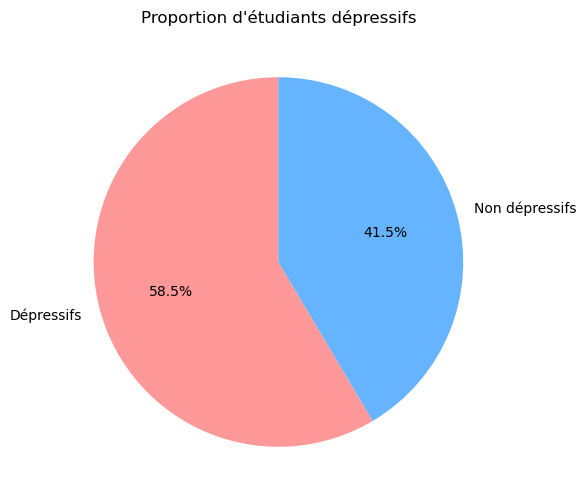

In [7]:
import matplotlib.pyplot as plt

# Calcul de la proportion d'étudiants dépressifs
kpi1_depression = df_kpi_final['Dépression'].mean() * 100

# Graphique en secteur
labels = ['Dépressifs', 'Non dépressifs']
sizes = [kpi1_depression, 100 - kpi1_depression]
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proportion d'étudiants dépressifs")
plt.show()

---

## **KPI 2** - Répartition des heures de sommeil

### Méthodologie
- Utilisation d'un diagramme en barre pour visualiser la répartition des heures de sommeil.

C:\Users\jpvt\AppData\Local\Temp\ipykernel_14416\1820412798.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kpi2_sommeil.index, y=kpi2_sommeil.values, palette="viridis")


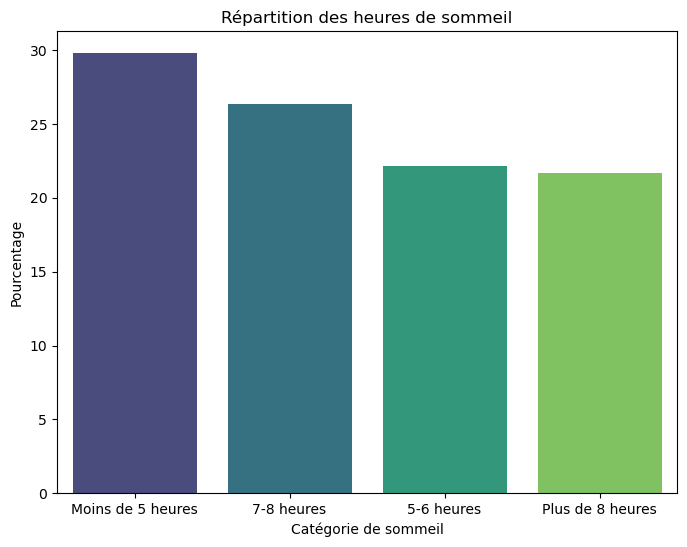

In [8]:
import seaborn as sns

# Répartition des heures de sommeil
kpi2_sommeil = df_kpi_final['Temps de sommeil'].value_counts(normalize=True) * 100

# Graphique en barre
plt.figure(figsize=(8, 6))
sns.barplot(x=kpi2_sommeil.index, y=kpi2_sommeil.values, palette="viridis")
plt.title("Répartition des heures de sommeil")
plt.xlabel("Catégorie de sommeil")
plt.ylabel("Pourcentage")
plt.show()

---

## **KPI 3** - Répartition des habitudes alimentaires

### Méthodologie
- Graphique interactif en barre horizontal pour représenter les habitudes alimentaires.

In [9]:
import plotly.express as px

# Répartition des habitudes alimentaires
kpi3_alimentaire = df_kpi_final['Habitudes Alimentaires'].value_counts(normalize=True) * 100

# Graphique interactif
fig = px.bar(
    x=kpi3_alimentaire.values,
    y=kpi3_alimentaire.index,
    orientation='h',
    labels={'x': 'Pourcentage', 'y': 'Habitudes Alimentaires'},
    title="Répartition des habitudes alimentaires",
    color=kpi3_alimentaire.index
)
fig.show()

---

## **KPI 4** - Pression académique

### Méthodologie
- Histogramme pour visualiser la distribution des niveaux de pression académique.


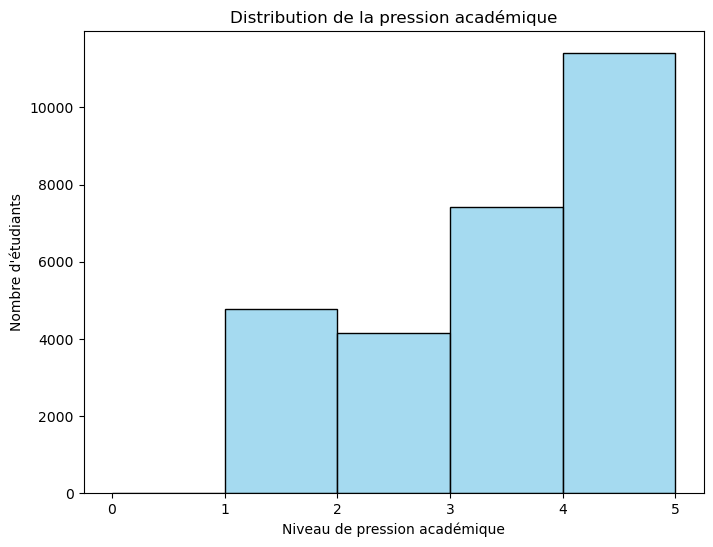

In [11]:
# Graphique de la pression académique
plt.figure(figsize=(8, 6))
sns.histplot(df_kpi_final['Pression Académique'], bins=5, color="skyblue")
plt.title("Distribution de la pression académique")
plt.xlabel("Niveau de pression académique")
plt.ylabel("Nombre d'étudiants")
plt.show()

---

## **KPI 5** - Proportion d'étudiants avec pensées suicidaires

### Méthodologie
- Utilisation d'une jauge interactive avec `plotly` pour visualiser la proportion d'étudiants ayant des pensées suicidaires.
- Cet indicateur permet de suivre l'ampleur de ce problème critique et d'adapter les stratégies d'intervention en conséquence.


In [16]:
import plotly.graph_objects as go

# Proportion d'étudiants avec pensées suicidaires
ratio_suicide = df_kpi_final['Pensées Suicidaires'].mean() * 100

# Graphique en jauge
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=ratio_suicide,
    title={'text': "Proportion d'étudiants avec pensées suicidaires (%)"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkred"},
        'steps': [
            {'range': [0, 50], 'color': "lightgreen"},
            {'range': [50, 75], 'color': "orange"},
            {'range': [75, 100], 'color': "red"}
        ],
    }
))

fig.show()

---

## **KPI 6** - Carte interactive : Répartition géographique des étudiants dépressifs

### Méthodologie
- Carte interactive utilisant Folium pour identifier les régions les plus touchées.

In [31]:
import folium

# Préparer les données pour Folium (en fonction du % de pensées suicidaires)
geo_data_suicide = df_kpi_final.groupby('Etat').agg({
    'Pensées Suicidaires': 'mean',
    'Latitude': 'mean',
    'Longitude': 'mean'
})
geo_data_suicide['Pensées Suicidaires'] = geo_data_suicide['Pensées Suicidaires'] * 100

# Carte interactive
map_suicide = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
for index, row in geo_data_suicide.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=row['Pensées Suicidaires'] / 2,  # Ajuster la taille pour un bon affichage
        color='blue',
        fill=True,
        fill_color='blue',
        tooltip=f"{index}: {row['Pensées Suicidaires']:.2f}%"
    ).add_to(map_suicide)

# Sauvegarder la carte
map_path = "../images/map_suicide.html"
map_suicide.save(map_path)

print("Carte interactive sauvegardée dans :", map_path)


Carte interactive sauvegardée dans : ../images/map_suicide.html


In [32]:
map_suicide